In [1]:
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display 
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib widget

In [2]:
day = '2022-06-16 Seine'
path = '/Volumes/T7/2022-06-16-Seine-Day2/Processed' # location of processed casts (one level up from individual casts)
# day = '2022-04-17 Seine'
# path = '/Volumes/T7/2022-04-17-Seine-Day1/Processed' # location of processed casts (one level up from individual casts)
groupdata = 'ProcData_0_GroupSummary.csv'
depthdata = 'Depth.csv'
UTCdiff = 4 # plus how many hours to go from computer time to UTC

In [3]:
# find the cast names

# casts = sorted(os.listdir(path))
casts = sorted([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])

# find the files

groupfiles = sorted(glob.glob(path + "/**/"+groupdata, recursive = True))
depthfiles = sorted(glob.glob(path + "/**/"+depthdata, recursive = True))

# pull in the first data file

summary = pd.read_csv(groupfiles[0])
summary.insert(loc=0, column='Cast', value=casts[0])
summary.insert(loc=1, column='Flow Depth [m]', value=pd.read_csv(depthfiles[0]).iloc[0,0])

# compile the master summary file from all casts

for i in range(1,len(groupfiles)):
    summary_i = pd.read_csv(groupfiles[i])
    summary_i.insert(loc=0, column='Cast', value=casts[i])
    summary_i.insert(loc=1, column='Flow Depth [m]', value=pd.read_csv(depthfiles[i]).iloc[0,0])
    summary = pd.concat([summary,summary_i])

# convert the date and times

summary['Start [DateTime]'] = pd.to_datetime(summary['Start [DateTime]'], format="%m%d%Y%H%M%S")+timedelta(hours = UTCdiff)
summary['End [DateTime]'] = pd.to_datetime(summary['End [DateTime]'], format="%m%d%Y%H%M%S")+timedelta(hours = UTCdiff)

+timedelta(hours = 4)

surface = summary.loc[(summary['Type/Location'] == 'surface')]
middepth = summary.loc[(summary['Type/Location'] == 'mid-depth')]
bottom = summary.loc[(summary['Type/Location'] == 'bottom')]

summary.to_csv(path+'/AllCasts_Group_Summaries.csv', index=False)
summary

,Cast,Flow Depth [m],Type/Location,Start [DateTime],End [DateTime],Durration [sec],Depth [m],z [m],PSU,Temp [C],Num. Images,Num. Particles,D16 [mu],D50 [mu],D84 [mu],D95 [mu],Total Vol [muL]
0,Cast02,10.645638,surface,2022-06-16 05:35:03,2022-06-16 05:36:32,89,0.890449,9.755188,29.721695,17.904953,180.0,5328.0,48.197122,99.663093,271.233986,360.976447,0.235855
1,Cast02,10.645638,mid-depth,2022-06-16 05:36:57,2022-06-16 05:39:00,123,5.946944,4.698694,31.903580,17.399114,228.0,2286.0,63.007202,145.520811,388.595911,428.748722,0.164179
2,Cast02,10.645638,bottom,2022-06-16 05:39:25,2022-06-16 05:41:27,122,10.543135,0.102503,32.413343,17.199230,242.0,2562.0,67.987481,189.384450,364.359022,420.415429,0.227661
0,Cast12,17.774280,surface,2022-06-16 10:38:31,2022-06-16 10:40:34,123,1.016966,16.757314,30.372418,18.305896,229.0,2399.0,27.085706,56.754700,118.947478,134.115426,0.028644
1,Cast12,17.774280,mid-depth,2022-06-16 10:41:03,2022-06-16 10:43:10,127,10.181261,7.593019,33.181158,16.799035,245.0,2484.0,81.485710,185.335079,299.107773,342.743126,0.336145
2,Cast12,17.774280,bottom,2022-06-16 10:43:53,2022-06-16 10:45:57,124,17.666657,0.107623,33.172711,16.796059,250.0,4063.0,81.846019,151.057392,256.696549,313.848743,0.643651
0,Cast24,11.617897,surface,2022-06-16 16:34:26,2022-06-16 16:35:11,45,0.806876,10.811021,28.935793,18.950804,89.0,915.0,84.859596,160.917608,332.470570,364.459553,0.118109
1,Cast24,11.617897,mid-depth,2022-06-16 16:35:43,2022-06-16 16:37:52,129,7.109317,4.508580,31.166661,17.936074,260.0,3911.0,74.025484,140.934006,227.700847,266.166432,0.380603
2,Cast24,11.617897,bottom,2022-06-16 16:38:15,2022-06-16 16:40:20,125,11.551776,0.066121,32.440981,17.204955,252.0,3379.0,64.664358,142.365592,287.274182,348.203417,0.294257


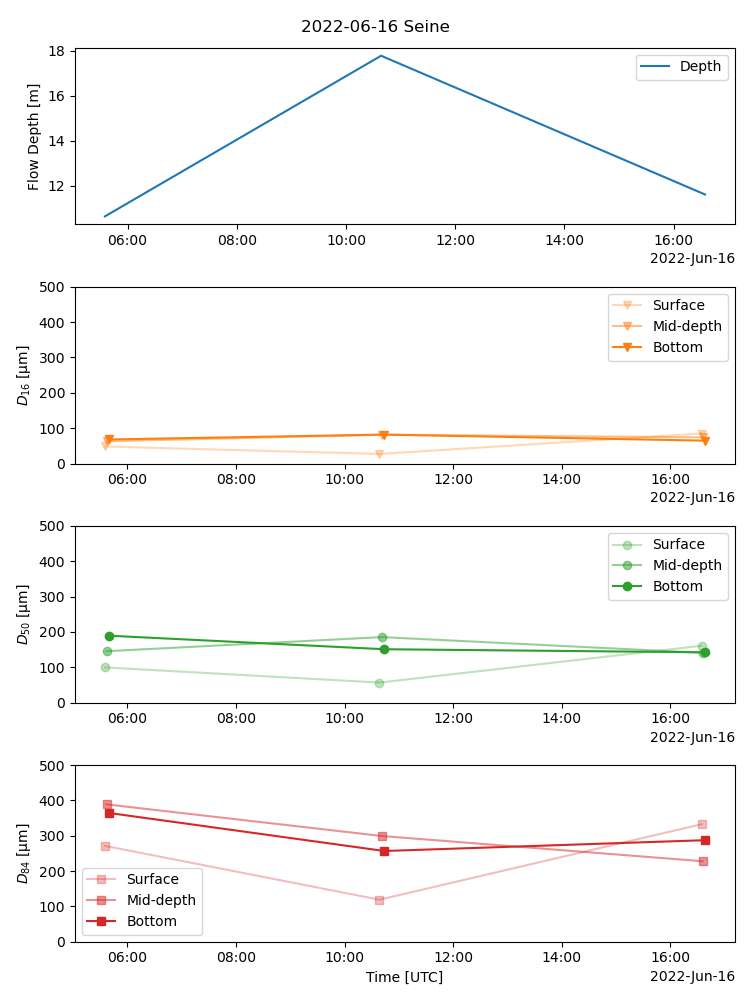

In [4]:
# plot the data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(7.5,10))
fig.suptitle(day, fontsize=12)

ax1.plot(surface['Start [DateTime]'], surface['Flow Depth [m]'],alpha=1,label='Depth')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('Flow Depth [m]')
ax1.legend()

ax2.plot(surface['Start [DateTime]'], surface['D16 [mu]'],color='C01',marker='v',alpha=0.3,label='Surface')
ax2.plot(middepth['Start [DateTime]'], middepth['D16 [mu]'],color='C01',marker='v',alpha=0.5,label='Mid-depth')
ax2.plot(bottom['Start [DateTime]'], bottom['D16 [mu]'],color='C01',marker='v',alpha=1,label='Bottom')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('$D_{16}$ [µm]')
ax2.set_ylim(0,500)
ax2.legend()

ax3.plot(surface['Start [DateTime]'], surface['D50 [mu]'],color='C02',marker='o',alpha=0.3,label='Surface')
ax3.plot(middepth['Start [DateTime]'], middepth['D50 [mu]'],color='C02',marker='o',alpha=0.5,label='Mid-depth')
ax3.plot(bottom['Start [DateTime]'], bottom['D50 [mu]'],color='C02',marker='o',alpha=1,label='Bottom')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.set_ylabel('$D_{50}$ [µm]')
ax3.set_ylim(0,500)
ax3.legend()

ax4.plot(surface['Start [DateTime]'], surface['D84 [mu]'],color='C03',marker='s',alpha=0.3,label='Surface')
ax4.plot(middepth['Start [DateTime]'], middepth['D84 [mu]'],color='C03',marker='s',alpha=0.5,label='Mid-depth')
ax4.plot(bottom['Start [DateTime]'], bottom['D84 [mu]'],color='C03',marker='s',alpha=1,label='Bottom')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(formatter)
ax4.set_ylabel('$D_{84}$ [µm]')
ax4.set_ylim(0,500)
ax4.set_xlabel('Time [UTC]')
ax4.legend()


fig.tight_layout();

plt.savefig(path+'/AllCasts_Group_Timeseries_D16_50_84.pdf',bbox_inches="tight", pad_inches=0.005)

# # ax1.set_ylim(33000,37000)
# ax2 = ax1.twinx()
# ax2.plot(ctd['Time (Seconds)'], ctd['Depth [m]'], alpha=1,label='depth')
# ax2.set_xlabel('Time [s]')
# ax2.set_ylabel('Depth [m]')
# ax2.axhline(y = maxdepth, color = 'k', linestyle = '--', label='max depth')
